In [1]:
import json
import pydot
import requests
import graphviz
import numpy as np
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt

In [26]:
info_type = 'pokemon'
url = f'https://pokeapi.co/api/v2/{info_type}?limit=1000&offset=0'
#parameters = {
 #   'APPID' : '2dbcde0477e10f32f587960671d2f32e',
 #   'units' : 'imperial'
#}

response = None
current_temp = None
try:
    r = requests.get(url)
    response = r.text
    response = json.loads(response)
except Exception as e:
    print(e)

In [27]:
all_urls = []
pokemon_urls = response['results']
for dictionary in pokemon_urls:
    all_urls.append(dictionary.get('url'))

In [28]:
try:
    r = requests.get(all_urls[0])
    response = r.text
    response = json.loads(response)
    print(response['game_indices'][-1]['game_index'])
    print(response['base_experience'])
except Exception as e:
    print(e)

1
64


# Ability Count Comparison

In [29]:
all_abilities = []
# Takes a while to run, but it works
for url in all_urls:
    try:
        r = requests.get(url)
        response = r.text
        response = json.loads(response)
        for ability_dictionary in response['abilities']:
            all_abilities.append(ability_dictionary['ability']['name'])
    except Exception as e:
        print(e)

In [30]:
ability_count = {}
for ability in all_abilities:
    count = all_abilities.count(ability)
    ability_count.update({ability : count})

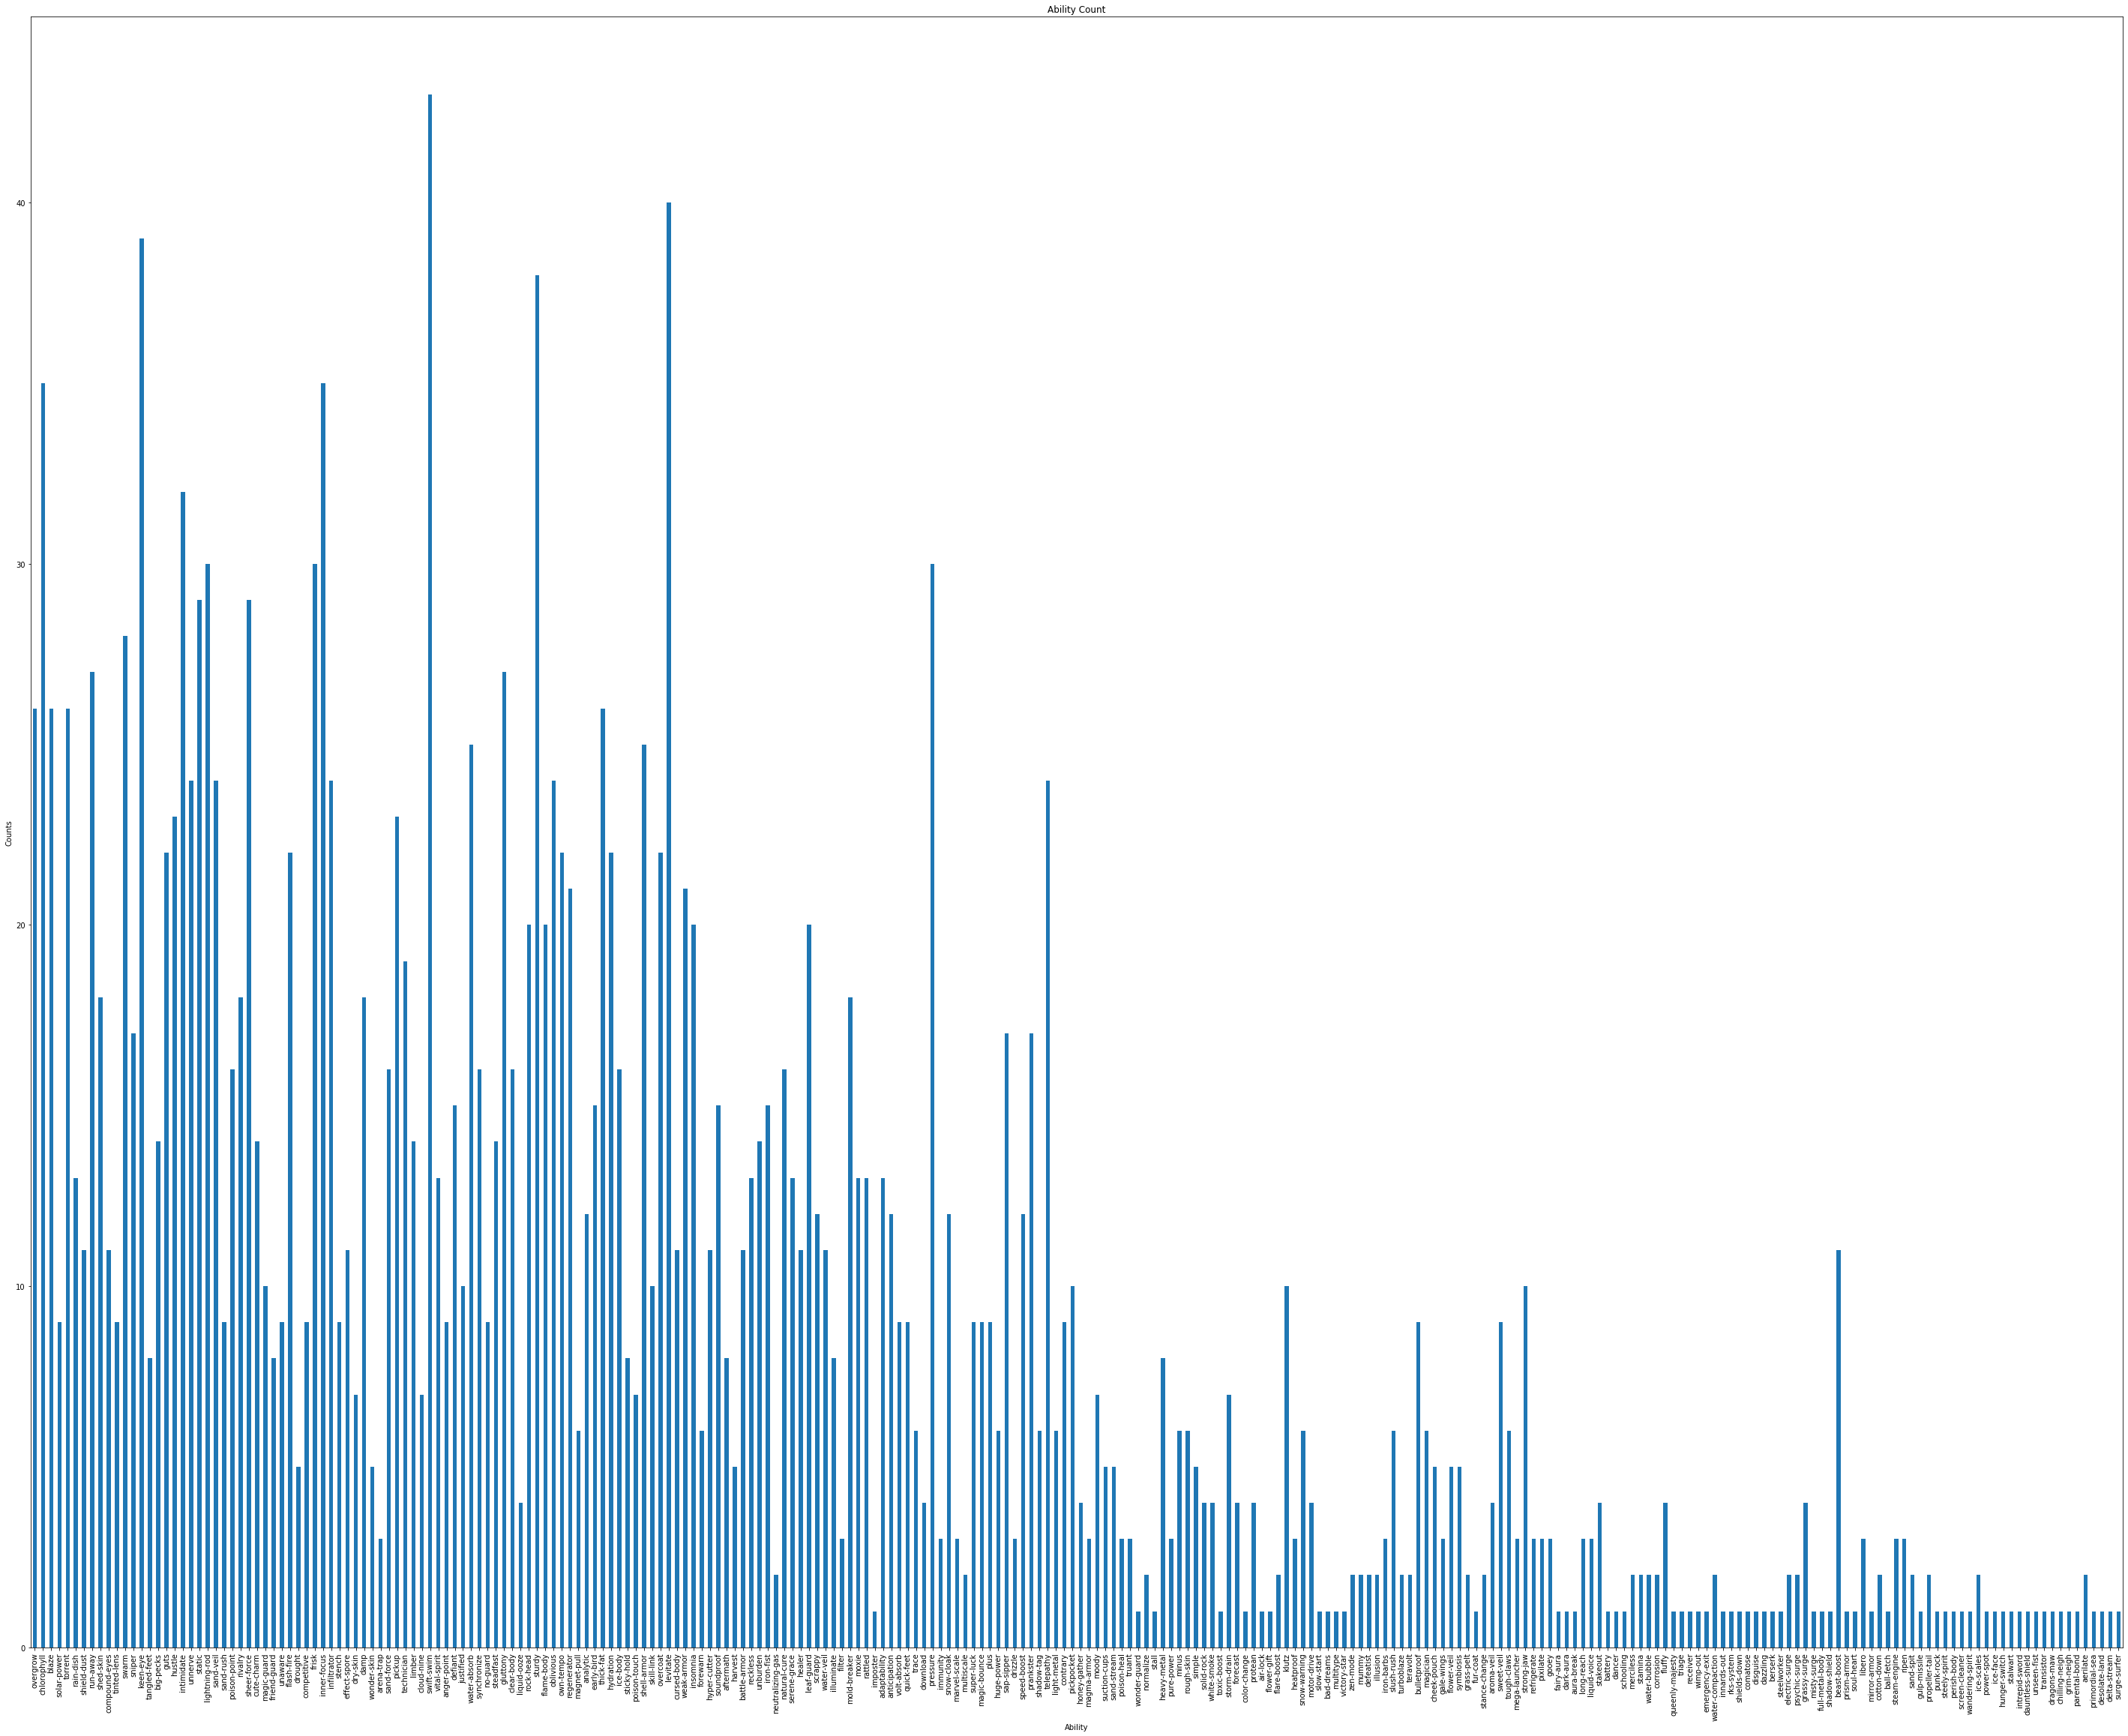

In [31]:
graph = pd.DataFrame.from_dict(ability_count, orient = 'index', columns = ['Count'])
graph.plot(kind = 'bar', legend = False, figsize = (50, 40))
plt.title("Ability Count")
plt.ylabel("Counts")
plt.xlabel("Ability")

plt.show()

# Base EXP Visualization

In [34]:
dex_number_to_exp = {}
for url in all_urls:
    try:
        r = requests.get(url)
        response = r.text
        response = json.loads(response)
        dex_number = response['id']
        if (dex_number > 5000):
            continue
        exp = response['base_experience']
        dex_number_to_exp.update({dex_number : exp})
    except Exception as e:
        print(e)

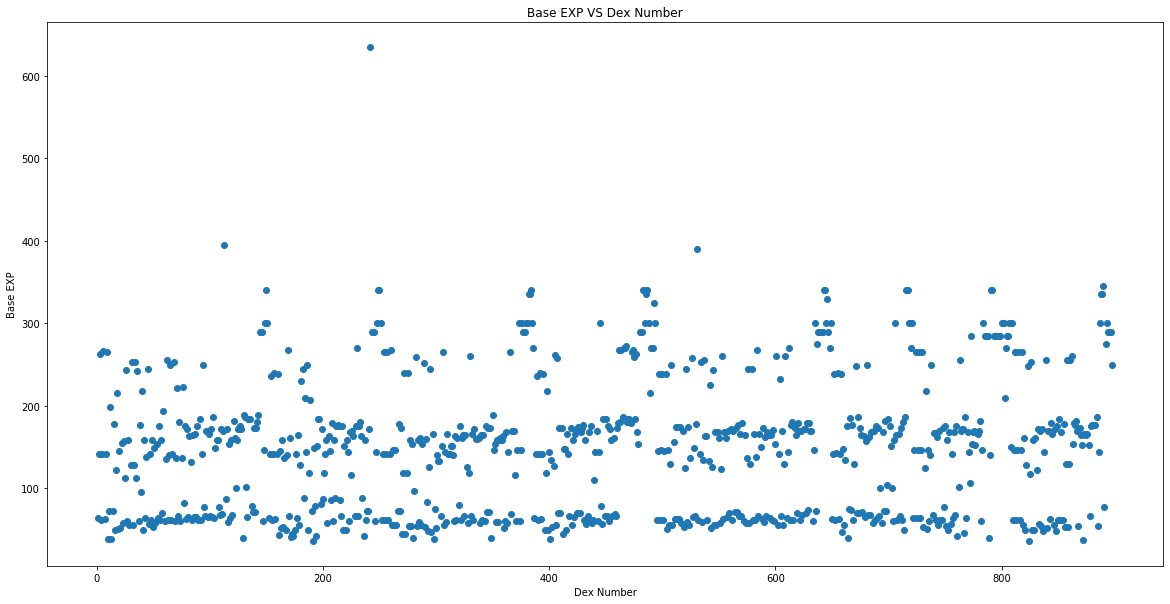

In [52]:
plt.figure(figsize = (20, 10))
plt.scatter(x = dex_number_to_exp.keys(), y = dex_number_to_exp.values())
plt.title("Base EXP VS Dex Number")
plt.ylabel("Base EXP")
plt.xlabel("Dex Number")

plt.show()

# Type Count Comparison

In [65]:
all_types = []
# Takes a while to run, but it works
for url in all_urls:
    try:
        r = requests.get(url)
        response = r.text
        response = json.loads(response)
        for type_dictionary in response['types']:
            all_types.append(type_dictionary['type']['name'])
    except Exception as e:
        print(e)

In [68]:
type_counts = {}
for pokemon_type in all_types:
    type_counts.update({pokemon_type : all_types.count(pokemon_type)})

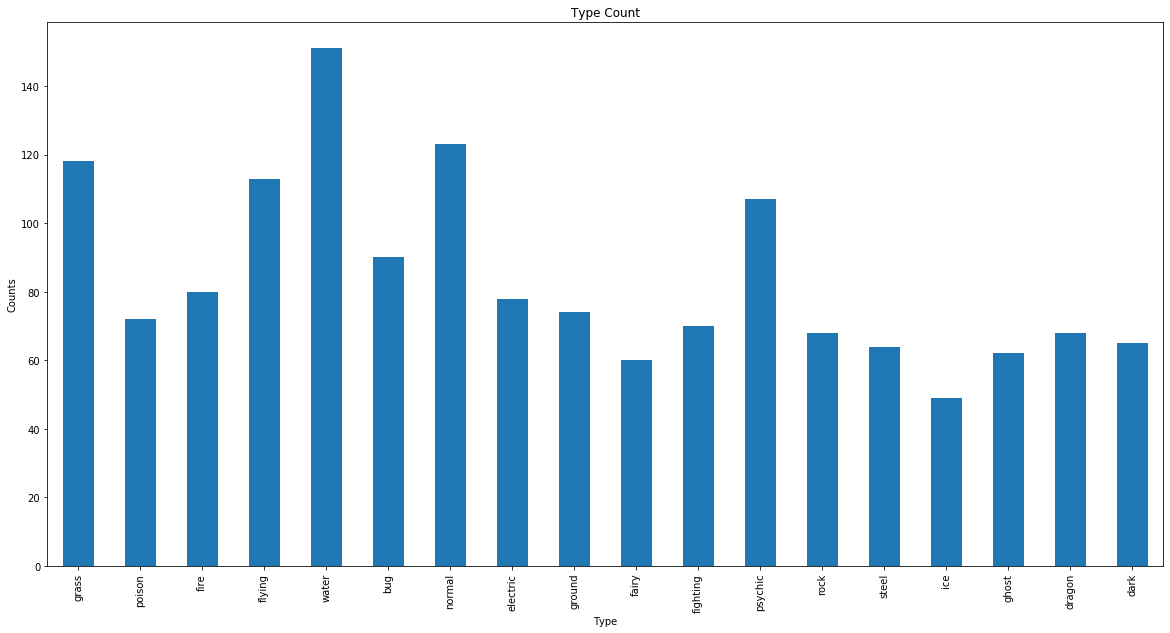

In [74]:
type_graph = pd.DataFrame.from_dict(type_counts, orient = 'index', columns = ['Count'])
type_graph.plot(kind = 'bar', legend = False, figsize = (20, 10))
plt.title("Type Count")
plt.ylabel("Counts")
plt.xlabel("Type")

plt.show()